In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('spamemail.csv')
df.head()

In [7]:
df1 = df.copy()

In [ ]:
df1['Id'] = range(len(df1))
df1


In [29]:
#Function to classify the emails
def classify_email(Message):
    keywords = ['urgent', 'immediately', 'asap', 'important','urgent', 'immediately', 'asap', 'emergency', 'important',
    'critical', 'deadline', 'alert', 'attention', 'priority',
    'rush', 'quick', 'fast', 'imminent', 'pressing', 'hurry',
    'now', 'must', 'mandatory']
    for word in keywords:
        if word in Message.lower():
            return 'Urgent'
    return 'Not Urgent'


df1['Classification'] = df1['Message'].apply(classify_email)
df1


,Category,Message,Id,Classification
0,ham,"Go until jurong point, crazy.. Available only ...",0,Not Urgent
1,ham,Ok lar... Joking wif u oni...,1,Not Urgent
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2,Not Urgent
3,ham,U dun say so early hor... U c already then say...,3,Not Urgent
4,ham,"Nah I don't think he goes to usf, he lives aro...",4,Not Urgent
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,5567,Urgent
5568,ham,Will ü b going to esplanade fr home?,5568,Not Urgent
5569,ham,"Pity, * was in mood for that. So...any other s...",5569,Not Urgent
5570,ham,The guy did some bitching but I acted like i'd...,5570,Not Urgent


In [30]:
#Checking the values
df1['Classification'].value_counts()

,count
Classification,
Not Urgent,4675
Urgent,897


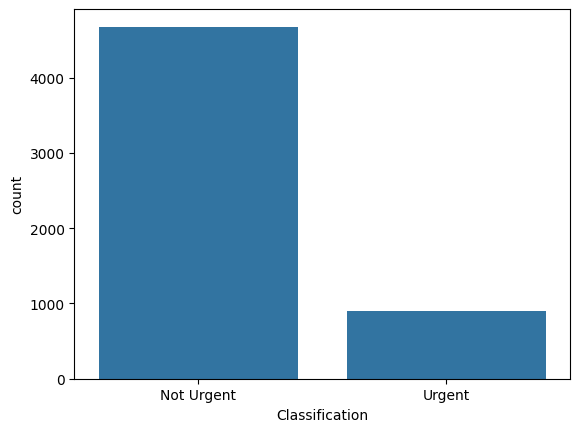

In [31]:
#Visualizing the Classification
sns.countplot(x='Classification', data=df1)
plt.show()

In [35]:
#Get a list of columns
cols = list(df1.columns)

# Move the 'Id' column to the end
cols.append(cols.pop(cols.index('Id')))

# Reorder the dataframe
df1 = df1[cols]
df1

,Category,Message,Classification,Id
0,ham,"Go until jurong point, crazy.. Available only ...",Not Urgent,0
1,ham,Ok lar... Joking wif u oni...,Not Urgent,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Not Urgent,2
3,ham,U dun say so early hor... U c already then say...,Not Urgent,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",Not Urgent,4
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,Urgent,5567
5568,ham,Will ü b going to esplanade fr home?,Not Urgent,5568
5569,ham,"Pity, * was in mood for that. So...any other s...",Not Urgent,5569
5570,ham,The guy did some bitching but I acted like i'd...,Not Urgent,5570


In [37]:
#Importing the libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [38]:
#Transform data in numerical values
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1['Message'])
y = df1['Classification']

In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [44]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array(['Not Urgent', 'Not Urgent', 'Not Urgent', ..., 'Not Urgent',
       'Not Urgent', 'Not Urgent'], dtype='<U10')

In [45]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8573991031390135
